### Importamos las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 
from pydotplus import graph_from_dot_data

### Importamos el dataset

In [2]:
df = pd.read_csv('titanic_train_out.csv')

### Seleccionamos las dimensiones para el entrenamiento

In [3]:
df.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone'],
      dtype='object')

In [4]:
X = df.iloc[:, [1,2,3,4,5,6,7]].values
y = df.Survived

### Separamos y_train y_test x_train y x_test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Usaremos primeramente MLPClassifier de sklearn

In [6]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

### Hacemos el entrenamiento

In [7]:
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

### Realizamos la prediccion

In [8]:
y_pred = classifier.predict(X_test)

### Verificamos la mtriz de confucion

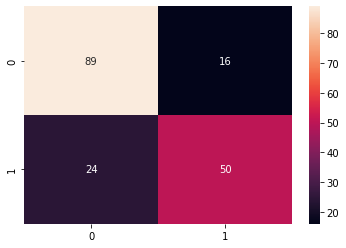

In [9]:
matriz = confusion_matrix(y_test, y_pred)
sn.heatmap(matriz, annot=True)
plt.show()

### Verificamos las metris de la matriz

In [11]:
accuracy_score(y_test, y_pred)

0.776536312849162

In [12]:
precision_score(y_test, y_pred)

0.7575757575757576

In [13]:
recall_score(y_test, y_pred)

0.6756756756756757

In [14]:
f1_score(y_test, y_pred)

0.7142857142857142

### Ahora haremos una red neuranal en numpy con la funcion sigmoid

### volvemos a importar el dataset

In [29]:
data = pd.read_csv('titanic_train_out.csv')

### Dividimos el dataset en 90% para entrenar y 10% para test

In [30]:
np.random.seed(21)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.iloc[sample], data.drop(sample)

### Seleccionamos cuales son las columnas de entrenamiento y cual el target

In [31]:
# Split into features and targets
features, targets = data.drop('Survived', axis=1), data['Survived']
features_test, targets_test = test_data.drop('Survived', axis=1), test_data['Survived']

### Definimos la funcion sigmoid como nuestra funcion inicializadora

In [36]:
def sigmoide(x):
    return 1/(1 + np.exp(-x))

### Definimos los hiperparametros

In [37]:
n_hidden = 2 # Número de unidades en la capa escondida
epochs = 1000 # Número de iteraciones sobre el conjunto de entrenamiento
alpha = 0.01 # Taza de aprendizaje
ult_costo = None 
m,k = features.shape # Número de ejemplos de entrenamiento, número de dimensiones en los datos 

### Inicializamos los pesos

In [39]:
entrada_escondida = np.random.normal(scale = 1/k**0.5,
                                     size = (k,n_hidden)
                                     )
escondida_salida = np.random.normal(scale = 1/k**0.5,
                                    size = n_hidden
                                    )

### Entrenamos el modelo

In [40]:
for e in range(epochs):
    # Variables para el gradiente
    gradiente_entrada_escondida = np.zeros(entrada_escondida.shape)
    gradiente_escondida_salida =  np.zeros(escondida_salida.shape)
    # Itera sobre el conjunto de entrenamiento
    for x,y in zip(features.values,targets):
        # Pasada hacia adelande (forward pass)
        z = sigmoide(np.matmul(x, entrada_escondida))
        y_ =sigmoide(np.matmul(escondida_salida,z)) # predicción 
        # Pasada hacia atrás (backward pass)
        salida_error = (y - y_) * y_ *(1- y_)
        escondida_error = np.dot(salida_error, escondida_salida) * z * (1 -z)
        gradiente_entrada_escondida += escondida_error * x[:,None]
        gradiente_escondida_salida += salida_error * z 
    # Actualiza los parámetros (pesos)
    entrada_escondida += alpha * gradiente_entrada_escondida / m 
    escondida_salida +=  alpha * gradiente_escondida_salida / m 
    if e % (epochs / 10 ) == 0:
        z = sigmoide(np.dot(features.values, entrada_escondida))
        y_ = sigmoide(np.dot(z, escondida_salida))
        # Función de costo
        costo = np.mean(( y_ - targets)**2 )
        if ult_costo  and ult_costo < costo:
            print("Costo de  entrenamiento: ", costo, " ADVERTENCIA -  Costo subiendo")
        else:
            print("Costo de entrenamiento: ", costo )
        ult_costo = costo

Costo de entrenamiento:  0.22636974970982315
Costo de entrenamiento:  0.22603511928674752
Costo de entrenamiento:  0.22571526328938218
Costo de entrenamiento:  0.22540911176502892
Costo de entrenamiento:  0.22511566870485705
Costo de entrenamiento:  0.22483400716040422
Costo de entrenamiento:  0.22456326465392423
Costo de entrenamiento:  0.2243026388687777
Costo de entrenamiento:  0.22405138360624036
Costo de entrenamiento:  0.22380880499527608


### Hacemos la prediccion con los datos de prueba

In [42]:
z = sigmoide(np.dot(features_test, entrada_escondida))
y_ = sigmoide(np.dot(z, escondida_salida))
predicciones =  y_ > 0.5 
predicciones

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

### Vemos cual es la precision de los resultados

In [44]:
precision = np.mean(predicciones == targets_test)
print("Precisión: {:.3f}".format(precision))

Precisión: 0.567


### Al ver que tenemos mayor precision con sklearn realizamos la prediccion de nuestros datos de prediccion

In [45]:
df_test = pd.read_csv('titanic_test_out.csv')

In [46]:
df_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1.0,0.0,0.447368,0.000000,1.0,0.00,1.0
1,1.0,1.0,0.618421,0.000000,0.0,0.50,0.0
2,0.5,0.0,0.815789,0.333333,1.0,0.00,1.0
3,1.0,0.0,0.355263,0.333333,0.0,0.00,1.0
4,1.0,1.0,0.289474,0.333333,0.0,0.50,0.0
...,...,...,...,...,...,...,...
413,1.0,0.0,0.315789,0.333333,0.0,0.00,1.0
414,0.0,1.0,0.513158,1.000000,0.5,1.00,1.0
415,1.0,0.0,0.500000,0.000000,0.0,0.00,1.0
416,1.0,0.0,0.315789,0.333333,0.0,0.00,1.0


In [47]:
 df_test['Survived'] = classifier.predict(df_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [48]:
df_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Survived
0,1.0,0.0,0.447368,0.000000,1.0,0.00,1.0,0.0
1,1.0,1.0,0.618421,0.000000,0.0,0.50,0.0,0.0
2,0.5,0.0,0.815789,0.333333,1.0,0.00,1.0,0.0
3,1.0,0.0,0.355263,0.333333,0.0,0.00,1.0,0.0
4,1.0,1.0,0.289474,0.333333,0.0,0.50,0.0,1.0
...,...,...,...,...,...,...,...,...
413,1.0,0.0,0.315789,0.333333,0.0,0.00,1.0,0.0
414,0.0,1.0,0.513158,1.000000,0.5,1.00,1.0,1.0
415,1.0,0.0,0.500000,0.000000,0.0,0.00,1.0,0.0
416,1.0,0.0,0.315789,0.333333,0.0,0.00,1.0,0.0
